# Esempi di implementazione dei cluster

Per prima cosa importiamo tutti i pacchetti necessari per eseguire e visualizzare il tutto.

In [1]:
import numpy as np

from sklearn.datasets import fetch_20newsgroups

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

dataset = fetch_20newsgroups(
    remove=("headers", "footers", "quotes"),
    subset="all",
    categories=categories,
    shuffle=True,
    random_state=42,
)

labels = dataset.target
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

print(f"{len(dataset.data)} documents - {true_k} categories")

3387 documents - 4 categories


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",
)
#t0 = time()
X_tfidf = vectorizer.fit_transform(dataset.data)

#print(f"vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

n_samples: 3387, n_features: 7929


In [3]:
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

## K-means e Iris dataset
Ora dovrei avere importato un po' tutto, iniziamo ad esempio a valutare k-means. Proviamo ad esempio sul dataset iris che dovrebbe avere tre categorie.

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.DESCR)
X_iris, y_iris = iris.data, iris.target
X_iris1 = iris["data"][:, (2, 3)]  # petal length, petal width

print(y_iris)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

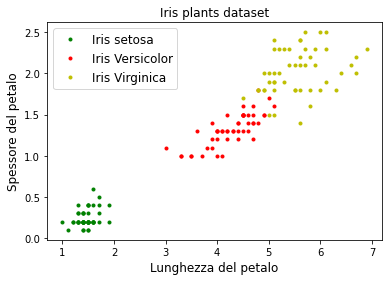

In [5]:
# Proviamo a visualizzare graficamente come esce
plt.figure()
plt.title("Iris plants dataset")
plt.plot(X_iris1[:, 0][y_iris == 0], X_iris1[:, 1][y_iris == 0], "g.", label="Iris setosa")
plt.plot(X_iris1[:, 0][y_iris == 1], X_iris1[:, 1][y_iris == 1], "r.", label="Iris Versicolor")
plt.plot(X_iris1[:, 0][y_iris == 2], X_iris1[:, 1][y_iris == 2], "y.", label="Iris Virginica")
plt.xlabel("Lunghezza del petalo", fontsize=12)
plt.ylabel("Spessore del petalo", fontsize=12)
plt.legend(loc="upper left", fontsize=12)
plt.show()

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1100: FutureWarning: 'sample_weight' was deprecated in version 1.3 and will be removed in 1.5.
  warnings.warn(


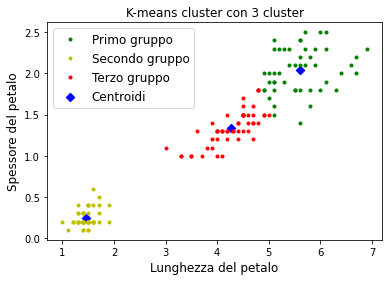

In [6]:
# In teoria applicando a questi dovrebbe uscire abbastanza bene prendendo
# 3 cluster
k_means_3 = KMeans(n_clusters = 3).fit(X_iris1, y_iris)
y_pred_iris = k_means_3.predict(X_iris1, y_iris)
centers3 = k_means_3.cluster_centers_

vec = (y_pred_iris == y_iris)
#print(vec)

plt.figure()
plt.title("K-means cluster con 3 cluster")
plt.plot(X_iris1[:, 0][y_pred_iris == 0], X_iris1[:, 1][y_pred_iris == 0], "g.", label="Primo gruppo")
plt.plot(X_iris1[:, 0][y_pred_iris == 1], X_iris1[:, 1][y_pred_iris == 1], "y.", label="Secondo gruppo")
plt.plot(X_iris1[:, 0][y_pred_iris == 2], X_iris1[:, 1][y_pred_iris == 2], "r.", label="Terzo gruppo")
plt.scatter(centers3[:, 0], centers3[:, 1], marker = "D", c = "b", label = "Centroidi")
plt.xlabel("Lunghezza del petalo", fontsize=12)
plt.ylabel("Spessore del petalo", fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.show()


In [7]:
# Proviamo per semplicità con sole due classi
y_iris1 = (iris["target"] == 2).astype(int)  # make problem binary: 1 if Iris virginica, else 0

kmeans2 = KMeans(n_clusters = 2).fit(X_iris1)
y_pred2 = KMeans(n_clusters = 2).fit_predict(X_iris1, y_iris1)
#print(y_pred2)

vec2 = (y_pred2 == y_iris1)
print(y_pred2)

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


[[4.92525253 1.68181818]
 [1.49215686 0.2627451 ]]


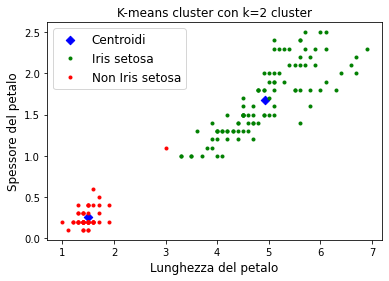

In [8]:
# Facciamone il grafico

centers = kmeans2.cluster_centers_
print(centers)

plt.figure()
plt.title("K-means cluster con k=2 cluster")
plt.scatter(centers[:, 0], centers[:, 1], c = "b", marker = "D", label = "Centroidi")
plt.plot(X_iris1[:, 0][y_pred2 == 0], X_iris1[:, 1][y_pred2 == 0], "g.", label="Iris setosa")
plt.plot(X_iris1[:, 0][y_pred2 == 1], X_iris1[:, 1][y_pred2 == 1], "r.", label="Non Iris setosa")
plt.xlabel("Lunghezza del petalo", fontsize=12)
plt.ylabel("Spessore del petalo", fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.show()

Per curiosità vediamo cosa succede se usiamo 4 cluster. Proviamo ad eseguire il codice.

C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1100: FutureWarning: 'sample_weight' was deprecated in version 1.3 and will be removed in 1.5.
  warnings.warn(


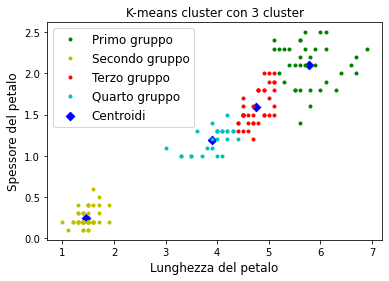

In [9]:
# In teoria applicando a questi dovrebbe uscire abbastanza bene prendendo
# 3 cluster
k_means_4 = KMeans(n_clusters = 4).fit(X_iris1, y_iris)
y_pred_iris4 = k_means_4.predict(X_iris1, y_iris)
centers4 = k_means_4.cluster_centers_

plt.figure()
plt.title("K-means cluster con 3 cluster")
plt.plot(X_iris1[:, 0][y_pred_iris4 == 0], X_iris1[:, 1][y_pred_iris4 == 0], "g.", label="Primo gruppo")
plt.plot(X_iris1[:, 0][y_pred_iris4 == 1], X_iris1[:, 1][y_pred_iris4 == 1], "y.", label="Secondo gruppo")
plt.plot(X_iris1[:, 0][y_pred_iris4 == 2], X_iris1[:, 1][y_pred_iris4 == 2], "r.", label="Terzo gruppo")
plt.plot(X_iris1[:, 0][y_pred_iris4 == 3], X_iris1[:, 1][y_pred_iris4 == 3], "c.", label="Quarto gruppo")
plt.scatter(centers4[:, 0], centers4[:, 1], marker = "D", c = "b", label = "Centroidi")
plt.xlabel("Lunghezza del petalo", fontsize=12)
plt.ylabel("Spessore del petalo", fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.show()

Proviamo ora a implementare un modo di valutare anche quale numero di classi conviene scegliere. Quindi dovremmo calcolare la quantità W(C). Proviamo.

Questo codice non mi serve a niente lo tengo solo di backup.

def W(cluster, centroids):
    W = 0
    n = len(centroids)
    cluster_copia = cluster
    
    for i in range(n):
        N = len(cluster[i])
        distanza = np.zeros(N)
        distanza[:] = np.linalg.norm(cluster_copia[i, :] - centroids[i])
        somma = distanza.sum()
        W = W + N*somma
    
    return W

In [10]:
import collections

def W_prova(cluster, labels):
    conto = collections.Counter(labels)
    W = 0
    n = len(conto)
    
    for i in range(n):
        N = conto[i]
        somma = (cluster[labels == i].sum())
        W = W + N*somma
        
    return W

17302.6421386668


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

[38415.69983005505, 17302.6421386668, 16529.853864745637, 11535.519591497678, 10375.71622125429]


<function matplotlib.pyplot.show(close=None, block=None)>

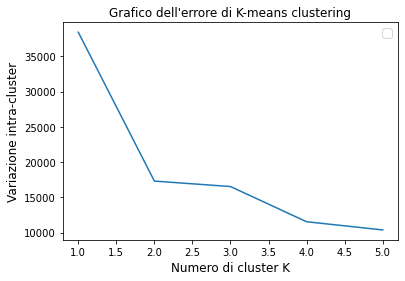

In [11]:
X_iris_pred = kmeans2.transform(X_iris1)
#print(y_pred2)
#conto = collections.Counter(y_pred2)
#print(conto)
#print(len(y_pred2))
#print(X_iris1)
#print(X_iris_pred)
#print(np.linalg.norm(X_iris1[0] - centers[0]))
W_prova(X_iris_pred[:, 0], y_pred2)
print(W_prova(X_iris_pred[:, 0], y_pred2))

W_lista = []

for k in range(1, 6):
    dati = KMeans(n_clusters = k).fit_transform(X_iris1)
    y_predk = KMeans(n_clusters = k).fit_predict(X_iris1)
    W_lista.append(W_prova(dati[:, 0], y_predk))
    
print(W_lista)

plt.figure()
plt.title("Grafico dell'errore di K-means clustering")
plt.plot(range(1, 6), W_lista)
plt.xlabel("Numero di cluster K", fontsize=12)
plt.ylabel("Variazione intra-cluster", fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.show


Se analizziamo il grafico sopra possiamo osservare come effettivamente tra 2 e 3 gruppi non cambi molto la cosa: questo è coerente con il fatto che possiamo usare 2 o 3 gruppi. Quindi potrei mostrare che il kink avviene a due gruppi qua (senza sapere nulla a priori ci sta come cosa in effetti).

Forse ora ha senso provare a vedere cosa esce con il clustering gerarchico.

## Clustering Gerarchico
Proviamo ad applicare qualche metodo di clustering gerarchico anche a questo dataset.

In [12]:
iris_agg_single = AgglomerativeClustering(distance_threshold = 0, 
                                             n_clusters = None,
                                             linkage = "single").fit(X_iris1)

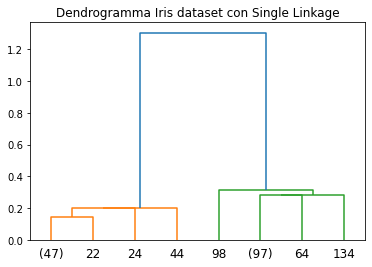

In [13]:
plt.title("Dendrogramma Iris dataset con Single Linkage")
plot_dendrogram(iris_agg_single, truncate_mode = "level", p = 3)

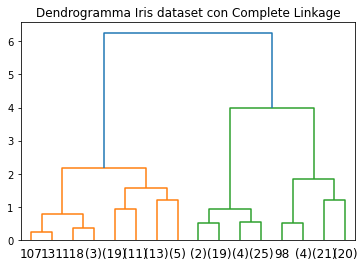

In [14]:
iris_agg_comp = AgglomerativeClustering(distance_threshold = 0, 
                                             n_clusters = None,
                                             linkage = "complete").fit(X_iris1)

plt.title("Dendrogramma Iris dataset con Complete Linkage")
plot_dendrogram(iris_agg_comp, truncate_mode = "level", p = 3)

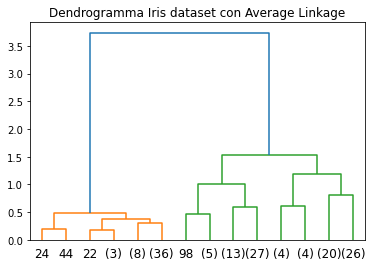

In [15]:
iris_agg_ave = AgglomerativeClustering(distance_threshold = 0, 
                                             n_clusters = None,
                                             linkage = "average").fit(X_iris1)

plt.title("Dendrogramma Iris dataset con Average Linkage")
plot_dendrogram(iris_agg_ave, truncate_mode = "level", p = 3)

Ma se io invece ora prendessi 3 cluster già definiti? Non so se ha molto senso però. Infatti non ha senso questa cosa, non si plotta il dendrogramma in questo caso.

In [16]:
iris_agg_ave3 = AgglomerativeClustering(#distance_threshold = 0, 
                                             n_clusters = 3,
                                             linkage = "average").fit(X_iris1)

#plot_dendrogram(iris_agg_ave3)

# Lasciamo perdere questa roba

Proviamo forse a vederne gli effetti graficamente, magari si osserva qualcosa di più significativo. Lavoriamo sempre con Iris dataset, poi potremmo provarne altri. Lavoriamo sempre con 3 cluster in quanto sappiamo che abbiamo 3 gruppi dalla nostra teoria.

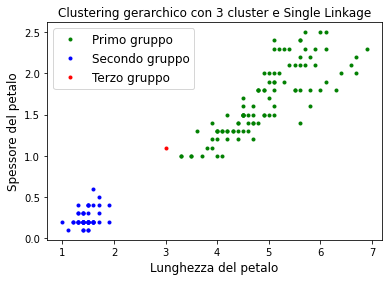

In [17]:
y_agg_single = AgglomerativeClustering(#distance_threshold = 0, 
                                             n_clusters = 3,
                                             linkage = "single").fit_predict(X_iris1)

# Proviamo a visualizzare graficamente come esce
plt.figure()
plt.title("Clustering gerarchico con 3 cluster e Single Linkage")
plt.plot(X_iris1[:, 0][y_agg_single == 0], X_iris1[:, 1][y_agg_single == 0], "g.", label="Primo gruppo")
plt.plot(X_iris1[:, 0][y_agg_single == 1], X_iris1[:, 1][y_agg_single == 1], "b.", label="Secondo gruppo")
plt.plot(X_iris1[:, 0][y_agg_single == 2], X_iris1[:, 1][y_agg_single == 2], "r.", label="Terzo gruppo")
plt.xlabel("Lunghezza del petalo", fontsize=12)
plt.ylabel("Spessore del petalo", fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.show()

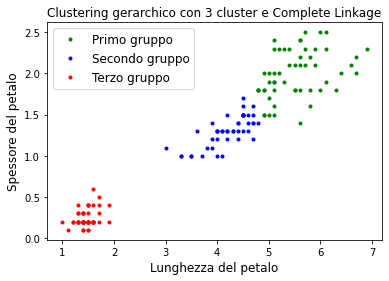

In [18]:
y_agg_comp = AgglomerativeClustering(#distance_threshold = 0, 
                                             n_clusters = 3,
                                             linkage = "complete").fit_predict(X_iris1)

# Proviamo a visualizzare graficamente come esce
plt.figure()
plt.title("Clustering gerarchico con 3 cluster e Complete Linkage")
plt.plot(X_iris1[:, 0][y_agg_comp == 0], X_iris1[:, 1][y_agg_comp == 0], "g.", label="Primo gruppo")
plt.plot(X_iris1[:, 0][y_agg_comp == 1], X_iris1[:, 1][y_agg_comp == 1], "b.", label="Secondo gruppo")
plt.plot(X_iris1[:, 0][y_agg_comp == 2], X_iris1[:, 1][y_agg_comp == 2], "r.", label="Terzo gruppo")
plt.xlabel("Lunghezza del petalo", fontsize=12)
plt.ylabel("Spessore del petalo", fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.show()

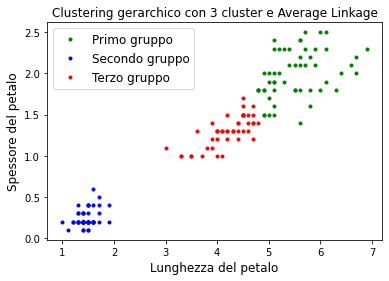

In [19]:
y_agg_ave = AgglomerativeClustering(#distance_threshold = 0, 
                                             n_clusters = 3,
                                             linkage = "average").fit_predict(X_iris1)

# Proviamo a visualizzare graficamente come esce
plt.figure()
plt.title("Clustering gerarchico con 3 cluster e Average Linkage")
plt.plot(X_iris1[:, 0][y_agg_ave == 0], X_iris1[:, 1][y_agg_ave == 0], "g.", label="Primo gruppo")
plt.plot(X_iris1[:, 0][y_agg_ave == 1], X_iris1[:, 1][y_agg_ave == 1], "b.", label="Secondo gruppo")
plt.plot(X_iris1[:, 0][y_agg_ave == 2], X_iris1[:, 1][y_agg_ave == 2], "r.", label="Terzo gruppo")
plt.xlabel("Lunghezza del petalo", fontsize=12)
plt.ylabel("Spessore del petalo", fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.show()

Direi che funziona abbastanza male quello con il single. Cerchiamo dataset in cui funzionano male gli altri. Utilizziamo quelli trovati sulla documentazione di sklearn. Ad esempio con il Single Linkage dovrebbe funzionare bene il 2 moon ma non gli altri proviamo. Prima di tutto sappiamo già che in questo caso abbiamo 2 cluster. Sfruttiamolo.

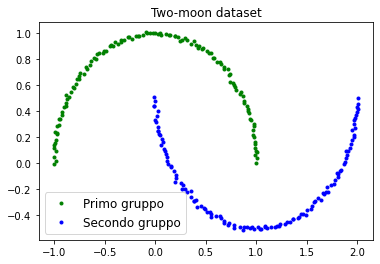

In [20]:
from sklearn.datasets import make_moons

X_moon, y_moon = make_moons(n_samples=250, noise=0.01, random_state=0)

# Visualizzazione grafica del dataset
plt.figure()
plt.title("Two-moon dataset")
plt.plot(X_moon[:, 0][y_moon == 0], X_moon[:, 1][y_moon == 0], "g.", label="Primo gruppo")
plt.plot(X_moon[:, 0][y_moon == 1], X_moon[:, 1][y_moon == 1], "b.", label="Secondo gruppo")
#plt.xlabel("Petal length", fontsize=14)
#plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.show()

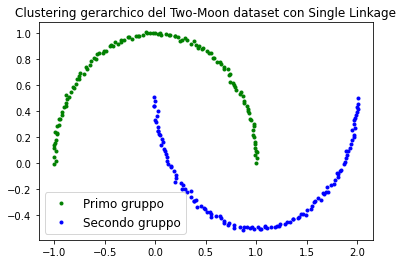

In [21]:
y_moon_single = AgglomerativeClustering(#distance_threshold = 0, 
                                             n_clusters = 2,
                                             linkage = "single").fit_predict(X_moon)

# Proviamo a visualizzare graficamente come esce
plt.figure()
plt.title("Clustering gerarchico del Two-Moon dataset con Single Linkage")
plt.plot(X_moon[:, 0][y_moon_single == 0], X_moon[:, 1][y_moon_single == 0], "g.", label="Primo gruppo")
plt.plot(X_moon[:, 0][y_moon_single == 1], X_moon[:, 1][y_moon_single == 1], "b.", label="Secondo gruppo")
#plt.xlabel("Petal length", fontsize=14)
#plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.show()

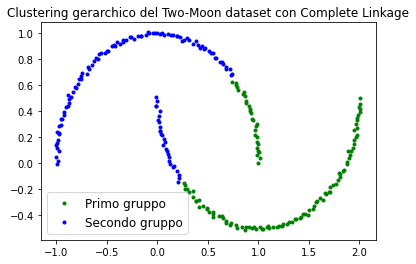

In [22]:
y_moon_comp = AgglomerativeClustering(#distance_threshold = 0, 
                                             n_clusters = 2,
                                             linkage = "complete").fit_predict(X_moon)

# Proviamo a visualizzare graficamente come esce
plt.figure()
plt.title("Clustering gerarchico del Two-Moon dataset con Complete Linkage")
plt.plot(X_moon[:, 0][y_moon_comp == 0], X_moon[:, 1][y_moon_comp == 0], "g.", label="Primo gruppo")
plt.plot(X_moon[:, 0][y_moon_comp == 1], X_moon[:, 1][y_moon_comp == 1], "b.", label="Secondo gruppo")
#plt.xlabel("Petal length", fontsize=14)
#plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.show()

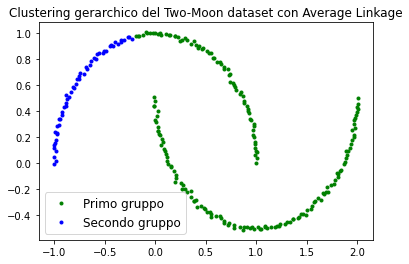

In [23]:
y_moon_ave = AgglomerativeClustering(#distance_threshold = 0, 
                                             n_clusters = 2,
                                             linkage = "average").fit_predict(X_moon)

# Proviamo a visualizzare graficamente come esce
plt.figure()
plt.title("Clustering gerarchico del Two-Moon dataset con Average Linkage")
plt.plot(X_moon[:, 0][y_moon_ave == 0], X_moon[:, 1][y_moon_ave == 0], "g.", label="Primo gruppo")
plt.plot(X_moon[:, 0][y_moon_ave == 1], X_moon[:, 1][y_moon_ave == 1], "b.", label="Secondo gruppo")
#plt.xlabel("Petal length", fontsize=14)
#plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.show()

Proviamo quello dei due cerchi concentrici che ho usato nella regressione logistica quale funziona meglio.

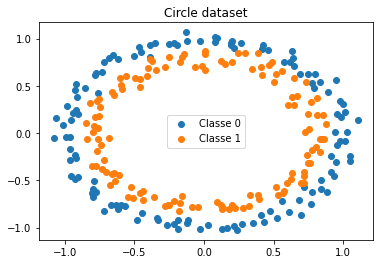

In [24]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=250, noise=0.05, random_state=100)

# Visualizzare il dataset
plt.title("Circle dataset")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Classe 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Classe 1")
#plt.xlabel("Feature 1")
#plt.ylabel("Feature 2")
plt.legend(loc = "best")
plt.show()

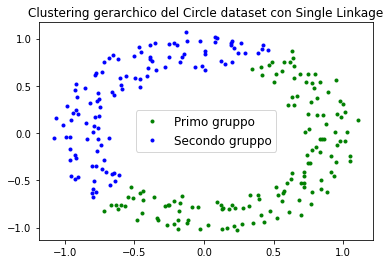

In [25]:
y_circles_single = AgglomerativeClustering(#distance_threshold = 0, 
                                             n_clusters = 2,
                                             linkage = "single").fit_predict(X)

# Proviamo a visualizzare graficamente come esce
plt.figure()
plt.title("Clustering gerarchico del Circle dataset con Single Linkage")
plt.plot(X[:, 0][y_circles_single == 0], X[:, 1][y_circles_single == 0], "g.", label="Primo gruppo")
plt.plot(X[:, 0][y_circles_single == 1], X[:, 1][y_circles_single == 1], "b.", label="Secondo gruppo")
#plt.xlabel("Petal length", fontsize=14)
#plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.show()

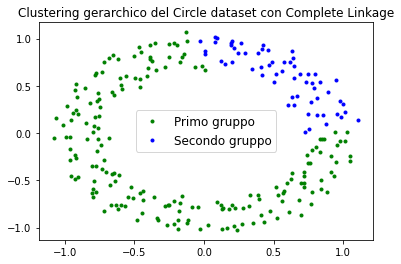

In [26]:
y_circles_complete = AgglomerativeClustering(#distance_threshold = 0, 
                                             n_clusters = 2,
                                             linkage = "complete").fit_predict(X)

# Proviamo a visualizzare graficamente come esce
plt.figure()
plt.title("Clustering gerarchico del Circle dataset con Complete Linkage")
plt.plot(X[:, 0][y_circles_complete == 0], X[:, 1][y_circles_complete == 0], "g.", label="Primo gruppo")
plt.plot(X[:, 0][y_circles_complete == 1], X[:, 1][y_circles_complete == 1], "b.", label="Secondo gruppo")
#plt.xlabel("Petal length", fontsize=14)
#plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.show()

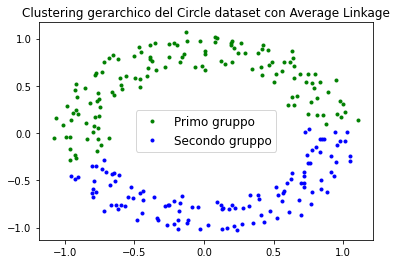

In [27]:
y_circles_ave = AgglomerativeClustering(#distance_threshold = 0, 
                                             n_clusters = 2,
                                             linkage = "average").fit_predict(X)

# Proviamo a visualizzare graficamente come esce
plt.figure()
plt.title("Clustering gerarchico del Circle dataset con Average Linkage")
plt.plot(X[:, 0][y_circles_ave == 0], X[:, 1][y_circles_ave == 0], "g.", label="Primo gruppo")
plt.plot(X[:, 0][y_circles_ave == 1], X[:, 1][y_circles_ave == 1], "b.", label="Secondo gruppo")
#plt.xlabel("Petal length", fontsize=14)
#plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.show()

Su questo dataset non sembra funzionare molto bene, in teoria neanche k-means dovrebbe funzionare bene (si sballa tutto). Eventualmente cerca ancora altri dataset su sklearn che funzionino male in uno dei casi (vedi questa pagina https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py)

### Dendrogrammi
Proviamo a costruire un dendrogramma che risulti in qualche modo veramente leggibile. Possiamo ad esempio prendere uno dei dataset sopra e usare alcuni dei dati per costruirlo ad hoc. Prendiamo qualche dato da Iris. Ad esempio potremmo prendere 3 dati per cluster e vedere che succede. Proviamo. Scegliamo anche una misura con cui funzioni bene la divisione.

In [28]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
lista = [0, 1, 2, 51, 52, 53, 130, 131, 132]
y_iris[lista]

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

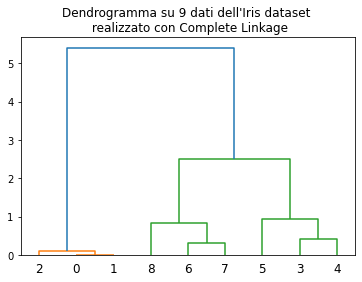

In [30]:
X_hoc = X_iris1[lista]
y_hoc = y_iris[lista]

iris_hoc_comp = AgglomerativeClustering(distance_threshold = 0, 
                                             n_clusters = None,
                                             linkage = "complete").fit(X_hoc)

plt.title("Dendrogramma su 9 dati dell'Iris dataset \n realizzato con Complete Linkage")
plot_dendrogram(iris_hoc_comp)

Direi che questo è effettivamente leggibile: inoltre a occhio si osserva che è chiaramente leggibile e raggruppa i gruppi più vicini. Proviamo anche con le altre misure.

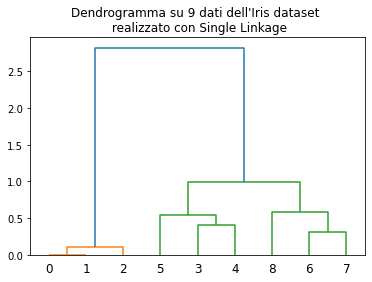

In [31]:
iris_hoc_single = AgglomerativeClustering(distance_threshold = 0, 
                                             n_clusters = None,
                                             linkage = "single").fit(X_hoc)

plt.title("Dendrogramma su 9 dati dell'Iris dataset \n realizzato con Single Linkage")
plot_dendrogram(iris_hoc_single)

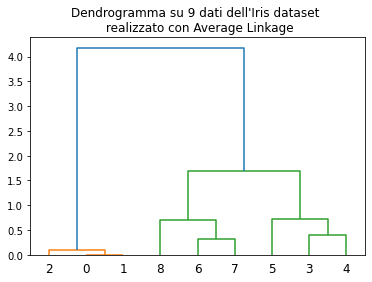

In [32]:
iris_hoc_ave = AgglomerativeClustering(distance_threshold = 0, 
                                             n_clusters = None,
                                             linkage = "average").fit(X_hoc)

plt.title("Dendrogramma su 9 dati dell'Iris dataset \n realizzato con Average Linkage")
plot_dendrogram(iris_hoc_ave)

Proviamo a rappresentarli anche graficamente i punti per capire effettivamente quali sono nello spazio.

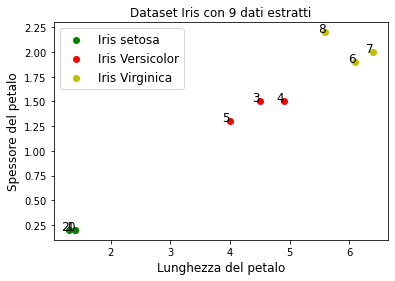

In [33]:
plt.figure()
plt.title("Dataset Iris con 9 dati estratti")

plt.scatter(X_hoc[2, 0], X_hoc[2,1], c = "g", label = "Iris setosa")
plt.text(X_hoc[2, 0], X_hoc[2,1], 2, fontsize=12, ha='right')

plt.scatter(X_hoc[5, 0], X_hoc[5,1], c = "r", label = "Iris Versicolor")
plt.text(X_hoc[5, 0], X_hoc[5,1], 5, fontsize=12, ha='right')

plt.scatter(X_hoc[8, 0], X_hoc[8,1], c = "y", label = "Iris Virginica")
plt.text(X_hoc[8, 0], X_hoc[8,1], 8, fontsize=12, ha='right')
    
for i in range(2): 
    plt.scatter(X_hoc[i, 0], X_hoc[i,1], c = "g")
    plt.text(X_hoc[i, 0], X_hoc[i,1], i, fontsize=12, ha='right')
for i in range(2): 
    plt.scatter(X_hoc[i+3, 0], X_hoc[i+3,1], c = "r")
    a = i+3
    plt.text(X_hoc[i+3, 0], X_hoc[i+3,1], a, fontsize=12, ha='right')
for i in range(2): 
    plt.scatter(X_hoc[i+6, 0], X_hoc[i+6,1], c = "y")
    a = i+6
    plt.text(X_hoc[i+6, 0], X_hoc[i+6,1], a, fontsize=12, ha='right')
    plt.xlabel("Lunghezza del petalo", fontsize=12)
plt.xlabel("Lunghezza del petalo", fontsize=12)
plt.ylabel("Spessore del petalo", fontsize=12)
plt.legend(loc = "best", fontsize = 12)
plt.show()

Il dendrogramma è sostanzialmente simile, cambiano le altezze, al massimo forse si potrebbero cercare punti che cambiano un dendrogramma e un altro. Tra l'altro è un buon esempio perchè si vede che a punti più vicini (quelli blu) corrisponde un'altezza nel dendrogramma che risulta essere minore, mentre altri gruppi si collegano più in alto.